# 1. Introduction


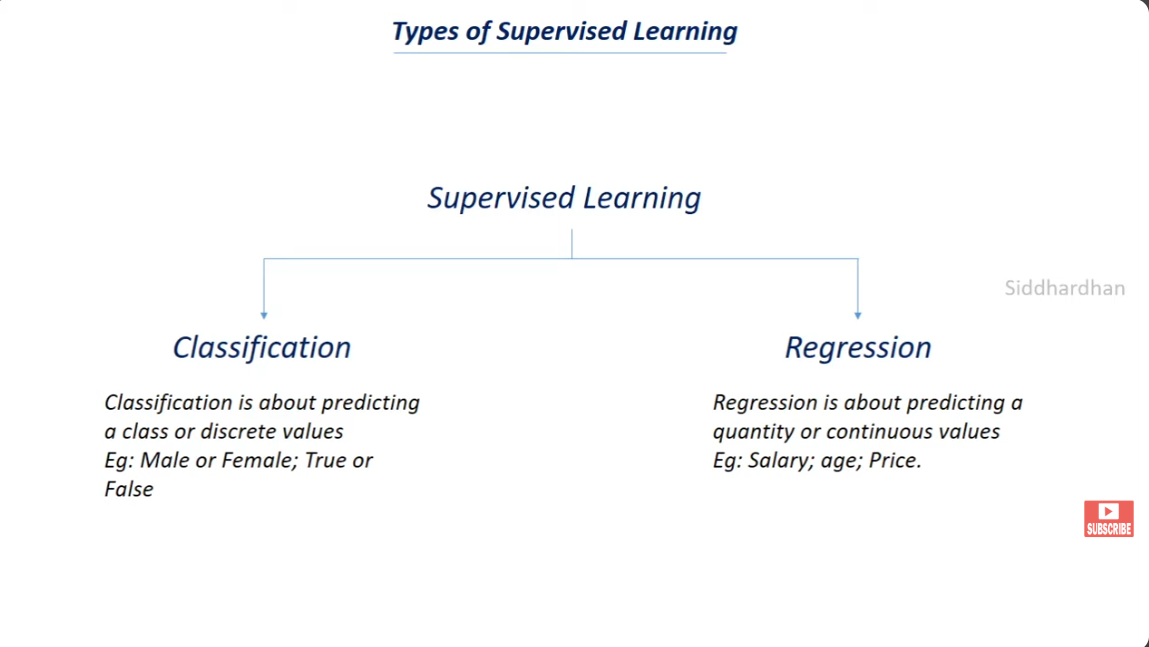

# 2. Work Flow

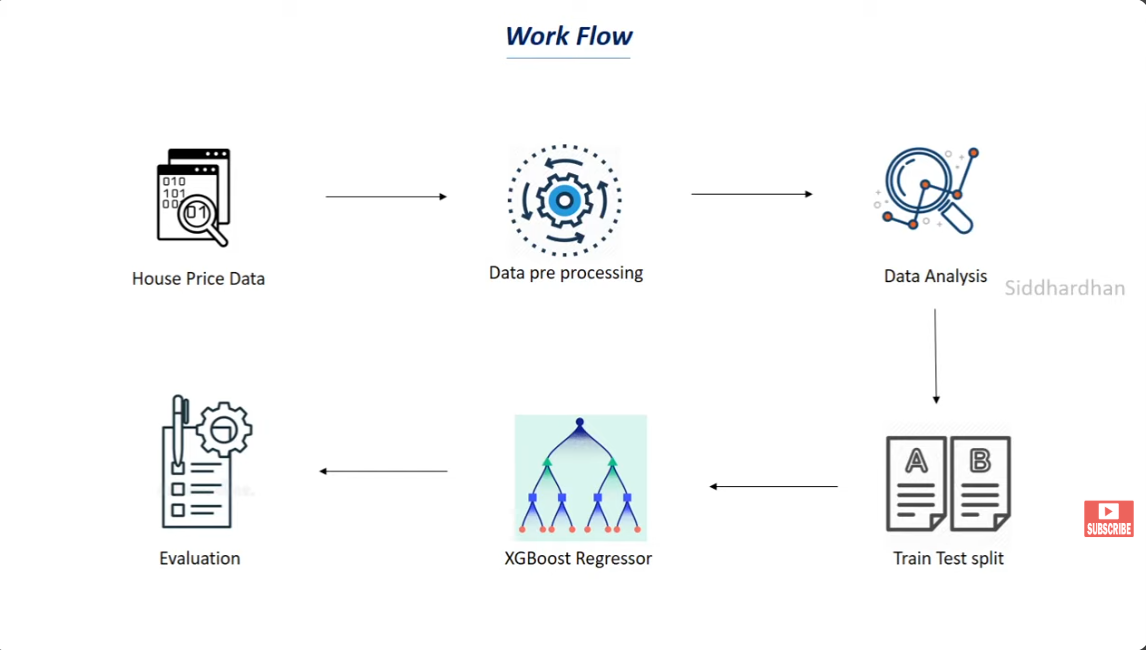

# 3. Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Checking the number of rows and columns in the dataset
df.shape

(506, 14)

In [ ]:
# Checking for missing values
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
# Filling missing values
df = df.fillna(0)

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
# Checking various statistical measures
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469112,10.768775,10.645889,0.067194,0.554695,6.284634,65.810277,3.795043,9.549407,408.237154,18.455534,356.674032,12.212846,22.532806
std,8.574755,23.025124,7.039321,0.250605,0.115878,0.702617,30.520606,2.105710,8.707259,168.537116,2.164946,91.294864,7.438324,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,0.320000,0.000000,5.000000
25%,0.068907,0.000000,4.877500,0.000000,0.449000,5.885500,40.425000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,8.560000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4. Understanding the correlation between various features in the dataset.

There are two types of correlation;

* Positive Correlation.

* Negative Correlation.

In [ ]:
# Checking the correlation
correlation = df.corr()

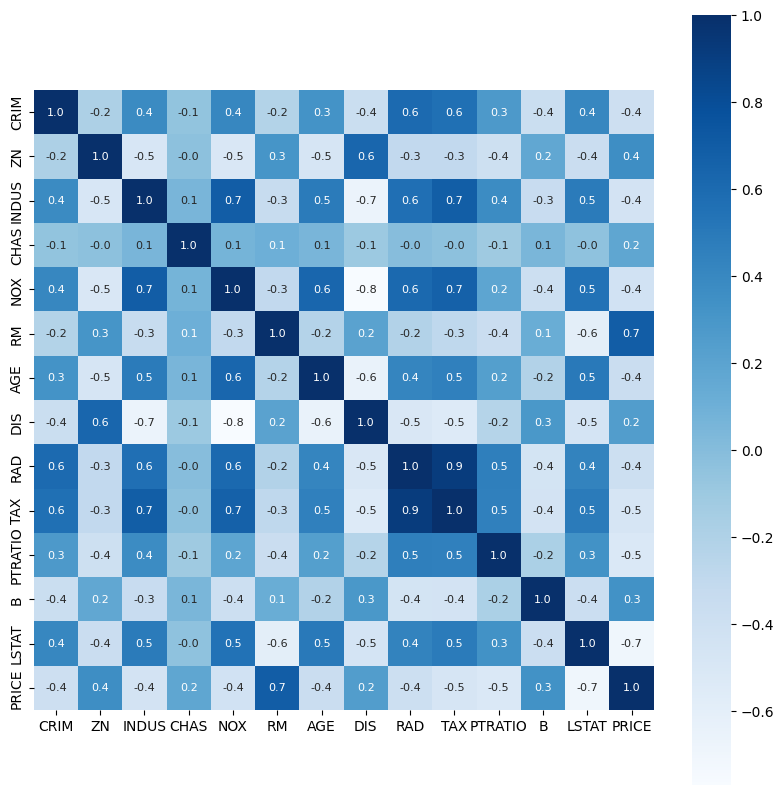

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues');

### 🔎 What this heatmap shows

* Each square represents the **correlation coefficient** (between -1 and +1) between two variables.
* **Blue shades** show the **strength of correlation**:

  * Dark blue (close to ±1) = strong correlation
  * Light blue (close to 0) = weak correlation
* Numbers inside are the correlation values (rounded to one decimal).

---

### 🔎 Key interpretations from your heatmap

1. **Strong Positive Correlations (close to +1):**

   * `TAX` and `RAD` → **0.9**
     → Areas with higher access to highways (RAD) tend to have higher property taxes.
   * `INDUS` and `NOX` → **0.8**
     → More industrial areas have higher air pollution (nitric oxides).
   * `RM` and `PRICE` → **0.7**
     → Houses with more rooms tend to be more expensive.

---

2. **Strong Negative Correlations (close to -1):**

   * `LSTAT` and `PRICE` → **-0.7**
     → Higher % of lower-status population → lower house prices.
   * `DIS` and `NOX` → **-0.8**
     → Areas farther from employment centers have lower air pollution.

---

3. **Moderate Relationships:**

   * `AGE` and `DIS` → **-0.8** (older houses tend to be in areas closer to city centers).
   * `PTRATIO` and `PRICE` → weak negative correlation (higher pupil-teacher ratio = slightly lower house prices).

---

4. **Near-Zero Correlations (≈0):**

   * `CHAS` (Charles River dummy variable) with most features → little/no relationship.
   * This means proximity to the river doesn’t strongly correlate with other numerical features.

---

### ✅ In short:

* **Price (PRICE)** is **positively correlated** with number of rooms (RM), but **negatively correlated** with % lower-status population (LSTAT).
* **Pollution (NOX)** is linked to industrial activity (INDUS) and distance to city centers (DIS).
* **Taxes (TAX)** strongly depend on highway accessibility (RAD).

# 5. Splitting the Data and Target

In [ ]:
X = df.drop(['PRICE'], axis = 1)
Y = df['PRICE']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   0.0  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

# 6. Splitting the data into Train and Test Data

In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# Checking the shape of our train data
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# 7. Model Training

XGBoost Regressor

In [ ]:
# Loading our model
model = XGBRegressor()

In [ ]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# 8. Model Evaluation

Prediction on training data



In [ ]:
# Accuray for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
# Predicting
print(training_data_prediction)

[23.173475  20.99347   20.101582  34.69607   13.889495  13.497748
 22.003567  15.180501  10.900543  22.69445   13.8005     5.5881104
 29.808315  49.998825  34.892097  20.601366  23.380234  19.211193
 32.69124   19.597088  26.978075   8.404611  46.00128   21.720982
 27.051828  19.35792   19.307768  24.798136  22.639374  31.7207
 18.550682   8.701801  17.401918  23.70115   13.296208  10.501085
 12.698788  25.00116   19.703587  14.911963  24.211182  25.019796
 14.907667  17.024925  15.59816   12.7065325 24.527735  15.016192
 49.99567   17.538628  21.181158  32.00295   15.605024  22.889355
 19.310612  18.725967  23.301453  37.202892  30.098835  33.117203
 20.99912   49.997765  13.399287   5.0047493 16.50629    8.410463
 28.66283   19.508207  20.59304   45.3985    39.79984   33.406467
 19.806564  33.400112  25.281658  49.994576  12.532008  17.437908
 18.606165  22.591307  49.99816   23.806684  23.308788  23.093765
 41.720097  16.140568  31.618176  36.064606   7.0092316 20.345657
 19.994242 

In [ ]:
# R squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared Error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared Error :  0.9999947478417182
Mean Absolute Error :  0.014251818751344575


# Visualizing the actual Prices and Predicted Prices

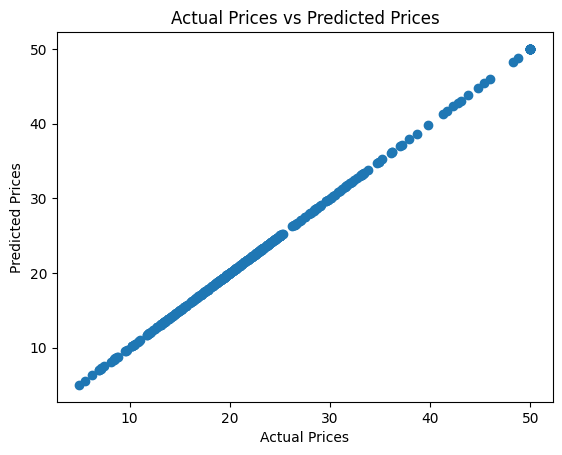

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show();

# 9. Prediction on test data

In [ ]:
# Test data prediction
test_data_prediction = model.predict(X_test)

In [ ]:
# Predicting
print(test_data_prediction)

[21.332571 21.02024  34.46655  27.599272  8.944873 13.165021 23.438658
 31.415442 19.238415 21.72112  24.582964 26.136913 20.050947 22.001335
 45.302322 21.971653 17.550182 10.011397  8.497385 14.837383 22.712511
 20.988556 36.12908  18.573076 14.673095 20.184225 44.06513  31.526224
 33.798077 18.160814 17.196196 20.525644 30.094006 23.490036  9.043704
 19.676687  8.453987 21.142828 21.7033   22.46598  27.697365 12.869799
 26.917587  7.635991 19.748837 14.099279 36.923763 16.337473 29.480095
 16.144989 28.30607  26.77522   6.466883 33.14158  45.933357 19.585135
 19.994127 21.054914 15.347777 21.808739 21.408945 19.4769   18.576124
 27.856174 33.000328 25.705402 50.151043 27.306297  8.976326 22.531595
 13.75942   7.855588 18.005943 18.283201 27.293873 23.422977 22.205437
 21.24178  19.182322 22.671837 36.59689  18.405733 20.138426 28.446224
 47.52642  36.92618  17.33451  24.35445  30.438784 20.059841 20.045565
 21.098768 11.0535   41.845997 39.44077   9.246289 44.172707 37.18822
 21.288

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared Error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared Error :  0.7642949179601621
Mean Absolute Error :  2.465959624683155
